In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels
from statsmodels.tsa.stattools import coint
import pandas as pd
import scipy.stats as st


In [2]:

msft = yf.Ticker("UVXY")

# get stock info
# print(msft.info)

# get historical market data
hist = msft.history(period="1y")

In [3]:
hist.shape

(253, 7)

In [4]:
hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-11,45.560001,50.320000,44.740002,48.220001,25486800,0,0
2020-03-12,61.200001,68.000000,54.240002,65.019997,32061700,0,0
2020-03-13,55.000000,69.800003,54.680000,57.240002,28028400,0,0
2020-03-16,79.000000,94.500000,73.699997,90.139999,19990800,0,0
2020-03-17,85.000000,96.800003,78.000000,87.230003,21166200,0,0
2020-03-18,104.570000,135.000000,95.330002,110.629997,20936800,0,0
2020-03-19,121.209999,130.229996,79.820000,94.089996,21728300,0,0
2020-03-20,87.879997,97.129997,72.330002,91.110001,17896300,0,0
2020-03-23,83.000000,88.489998,65.580002,69.930000,13614800,0,0


In [5]:
hist['gains'] = (hist.Close - hist.Close.shift(1))/hist.Close.shift(1) * 100

In [6]:
hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,gains
Date,,,,,,,,
2020-03-11,45.560001,50.320000,44.740002,48.220001,25486800,0,0,NaN
2020-03-12,61.200001,68.000000,54.240002,65.019997,32061700,0,0,34.840305
2020-03-13,55.000000,69.800003,54.680000,57.240002,28028400,0,0,-11.965542
2020-03-16,79.000000,94.500000,73.699997,90.139999,19990800,0,0,57.477283
2020-03-17,85.000000,96.800003,78.000000,87.230003,21166200,0,0,-3.228307
2020-03-18,104.570000,135.000000,95.330002,110.629997,20936800,0,0,26.825625
2020-03-19,121.209999,130.229996,79.820000,94.089996,21728300,0,0,-14.950738
2020-03-20,87.879997,97.129997,72.330002,91.110001,17896300,0,0,-3.167176
2020-03-23,83.000000,88.489998,65.580002,69.930000,13614800,0,0,-23.246625


<AxesSubplot:xlabel='Date'>

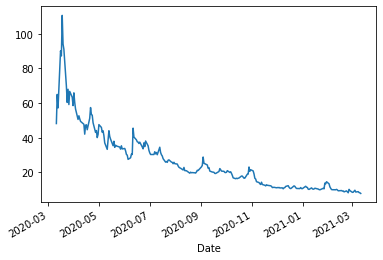

In [7]:
hist.Close.plot()

In [8]:
hist['gains'].describe()

count    252.000000
mean      -0.362025
std        8.899054
min      -23.246625
25%       -4.950822
50%       -1.805402
75%        2.229161
max       57.477283
Name: gains, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gains', ylabel='Density'>

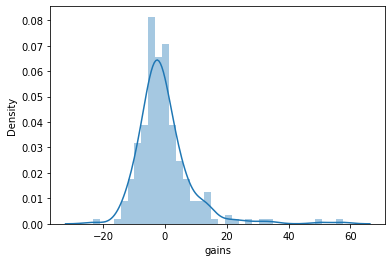

In [9]:
sns.distplot(hist.gains)

In [10]:
st.norm.cdf(-5, hist['gains'].mean(), hist['gains'].std())

0.30112202650420566

In [11]:
spy = yf.Ticker("SPY")
spy_hist = spy.history(period="1y")


In [12]:
spy_hist['gains'] = (spy_hist.Close - spy_hist.Close.shift(1))/spy_hist.Close.shift(1) * 100
spy_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,gains
Date,,,,,,,,
2020-03-11,275.554122,276.771380,265.914138,269.330322,255316300,0.0,0,NaN
2020-03-12,251.306895,261.771475,243.139414,243.561539,392220700,0.0,0,-9.567725
2020-03-13,258.266891,266.503096,243.964004,264.382690,329566100,0.0,0,8.548621
2020-03-16,236.758577,252.190392,233.008615,235.452972,297240000,0.0,0,-10.942365
2020-03-17,240.547808,251.473788,232.723932,248.165558,262070500,0.0,0,5.399204
...,...,...,...,...,...,...,...,...
2021-03-05,380.459991,384.760010,372.640015,383.630005,151959800,0.0,0,1.839658
2021-03-08,384.660004,387.679993,381.420013,381.720001,122957100,0.0,0,-0.497877
2021-03-09,385.850006,389.910004,385.309998,387.170013,113457800,0.0,0,1.427751


In [13]:
spy_hist['gains'].describe()

count    252.000000
mean       0.170752
std        1.928417
min      -10.942365
25%       -0.547952
50%        0.272566
75%        1.033811
max        9.060328
Name: gains, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gains', ylabel='Density'>

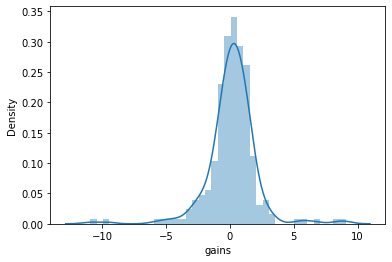

In [14]:
sns.distplot(spy_hist.gains)

In [15]:
st.norm.cdf(-1, spy_hist['gains'].mean(), spy_hist['gains'].std())

0.2718905619290271

<AxesSubplot:xlabel='Date'>

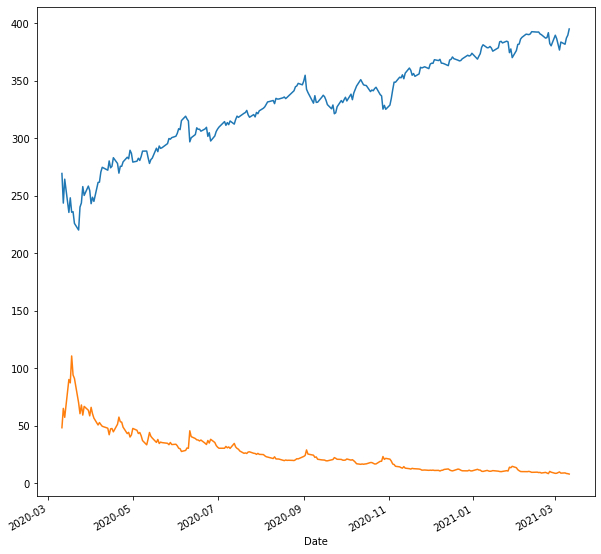

In [16]:
spy_hist.Close.plot(figsize=(10,10))
hist.Close.plot()

In [17]:
np.corrcoef(spy_hist.Close, hist.Close)

array([[ 1.        , -0.93725023],
       [-0.93725023,  1.        ]])

In [18]:
spy_hist.gains.fillna(0, inplace=True)
hist.gains.fillna(0, inplace=True)

In [19]:
np.corrcoef(spy_hist.gains, hist.gains)

array([[ 1.        , -0.73302701],
       [-0.73302701,  1.        ]])

<AxesSubplot:xlabel='Date'>

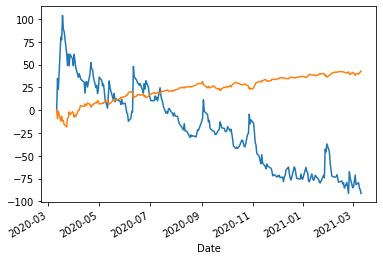

In [20]:
hist.gains.cumsum().plot()
spy_hist.gains.cumsum().plot()

In [21]:
score, pvalue, _ = coint(hist.gains, spy_hist.gains)
print(score, pvalue)

score, pvalue, _ = coint(hist.Close, spy_hist.Close)
print(score, pvalue)

-14.199874026140561 1.6533001544224817e-25
-2.6393275992854583 0.22215433379200844


In [22]:
np.corrcoef(hist.Close, spy_hist.Close)

array([[ 1.        , -0.93725023],
       [-0.93725023,  1.        ]])

In [23]:
spy_hist['spy_gains'] = spy_hist['gains']

In [24]:
hist.reset_index(inplace=True)
spy_hist.reset_index(inplace=True)

In [25]:
data = pd.merge(hist[['Date','gains']], spy_hist[['Date','spy_gains']], on='Date')
data.set_index(keys='Date')

,gains,spy_gains
Date,,
2020-03-11,0.000000,0.000000
2020-03-12,34.840305,-9.567725
2020-03-13,-11.965542,8.548621
2020-03-16,57.477283,-10.942365
2020-03-17,-3.228307,5.399204
...,...,...
2021-03-05,-10.564100,1.839658
2021-03-08,2.293576,-0.497877
2021-03-09,-5.829601,1.427751


In [26]:
data['rate'] = (data.gains+0.1) / (data.spy_gains+0.1)

In [27]:
data[data['rate']>0]

,Date,gains,spy_gains,rate
0,2020-03-11,0.000000,0.000000,1.000000
7,2020-03-20,-3.167176,-4.309413,0.728647
8,2020-03-23,-23.246625,-2.556823,9.421365
10,2020-03-25,12.582779,1.497019,7.941531
14,2020-03-31,-7.663193,-1.490534,5.439057
17,2020-04-03,-6.323456,-1.445420,4.625659
19,2020-04-07,4.150202,0.101950,21.045862
22,2020-04-13,-3.375787,-0.913008,4.029217
25,2020-04-16,0.656496,0.482424,1.298876
56,2020-06-01,0.834074,0.404165,1.852714


In [28]:
data.rate.describe()

count    253.000000
mean      -4.836395
std       29.520087
min     -344.845018
25%       -6.190016
50%       -3.963395
75%       -0.876000
max      118.374730
Name: rate, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

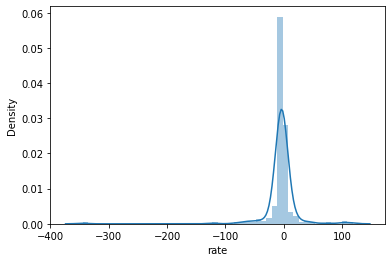

In [29]:
sns.distplot(data.rate)

In [30]:
data.fillna(0,inplace=True)
data.isna().sum()

Date         0
gains        0
spy_gains    0
rate         0
dtype: int64

In [31]:
print((data.rate>50).sum())
# data = data[abs(data['rate'])<50]
(data.rate>50).sum()

4


4

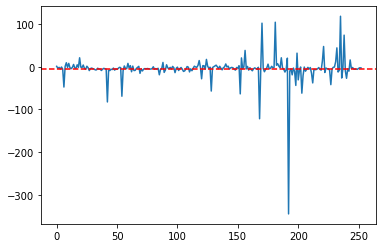

In [32]:
data.rate.plot()
plt.axhline(data.rate.mean(), color='red', linestyle='--') 

-4.836395263680605 29.520086623538127


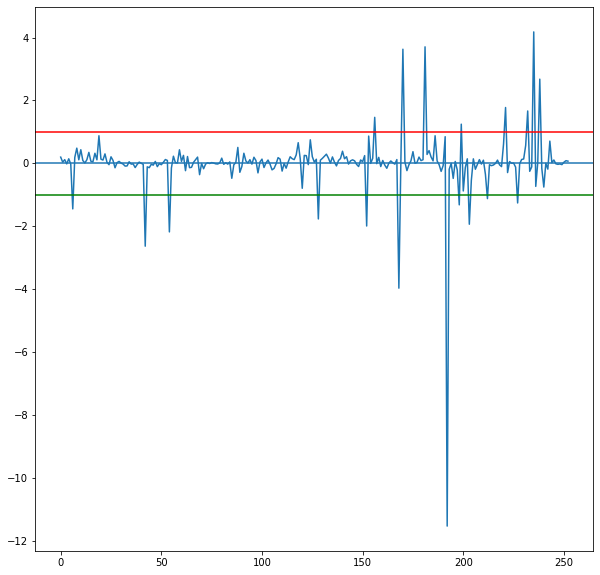

In [36]:
def zscore(series):
    print(series.mean(), series.std())
    return (series - series.mean()) / np.std(series)

z_score = zscore(data.rate)
z_score.plot(figsize=(10,10))
plt.axhline(z_score.mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

In [ ]:
# rolling ?

In [37]:
print(z_score.shape)
train = z_score[:200]
test = z_score[200:]
print(train.shape, test.shape)

(253,)
(200,) (53,)


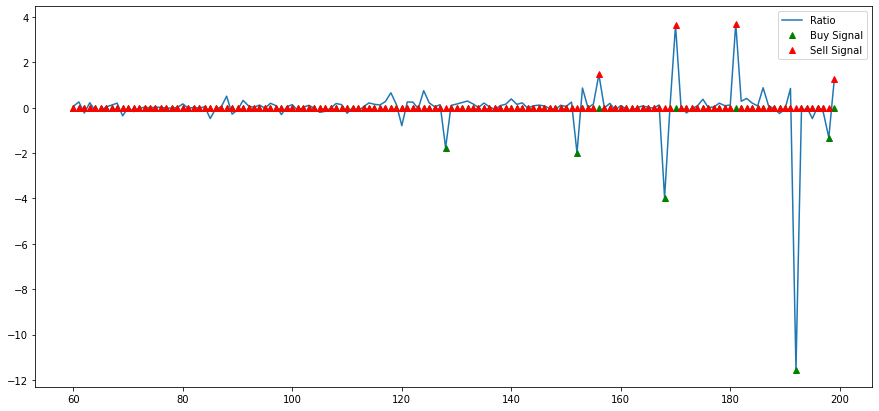

In [46]:
plt.figure(figsize=(15,7))
train[60:].plot()
buy = train.copy()
sell = train.copy()
buy[z_score>-1] = 0
sell[z_score<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
# plt.axis((x1,x2,data.rate.min(),data.rate.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

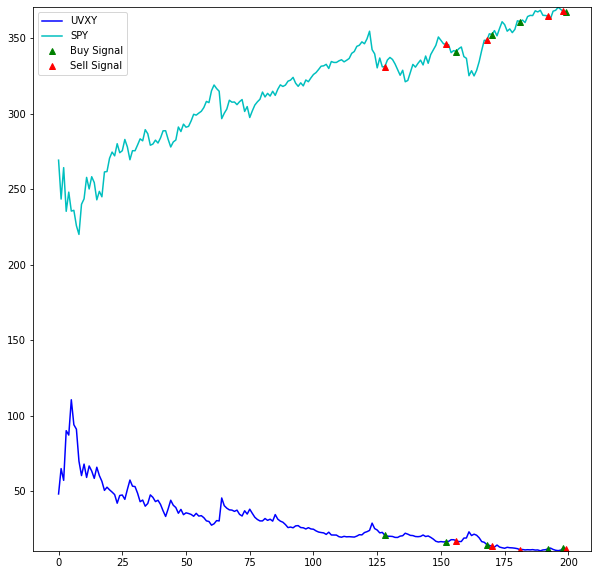

In [57]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(10,10))
S1 = hist.iloc[:200].Close
S2 = spy_hist.iloc[:200].Close
S1.plot(color='b')
S2.plot(color='c')

buyR = 0*S1.copy()
sellR = 0*S1.copy()
# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]
buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
plt.legend(['UVXY','SPY', 'Buy Signal', 'Sell Signal'])
plt.show()